## HW 1

1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

    а) зависимость цены на недвижимость в еонкретном регионе от времени,
    
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
    
    в) количество отказов компьютера,
    
    г) число обращений в поликлинику по району,
    
    д) координаты автобуса при движении по маршруту,
    
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

### Ответы

##### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

1. Наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в конкретном регионе от времени - например, среднее значение по региону,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В - набор значений скорости в привязке ко времени,

в) количество отказов компьютера - например, количество отказов за день в течение периода времени,

г) число обращений в поликлинику по району - число обращений за день в течение достаточно длительного периода,

д) координаты автобуса при движении по маршруту - возможно, для целей обработки удобнее будет представить координаты в виде одного значения, предварительно разбив всю карту на квадраты размером около 1/2 автобуса, 

е) координаты фигуры нарушителя в файле видеофиксации охранной системы - аналогично д).

##### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [4]:
data.isnull().sum()

DUQ_MW    0
dtype: int64

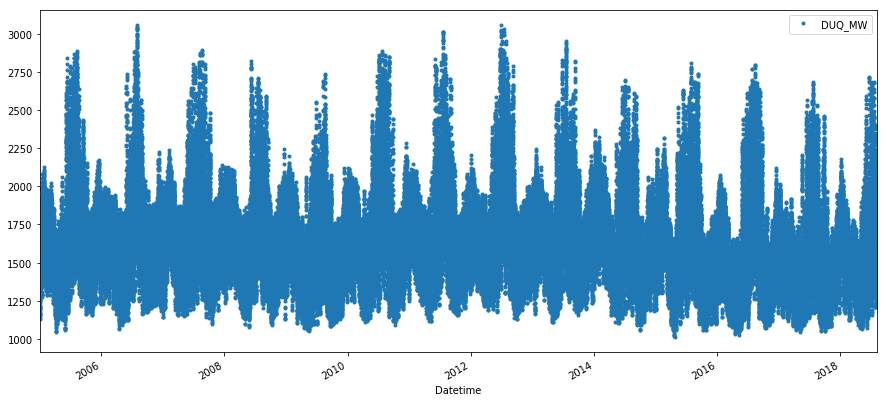

In [5]:
data.plot(style = '.', figsize = (15, 7))

In [6]:
data.index.unique()

DatetimeIndex(['2005-12-31 01:00:00', '2005-12-31 02:00:00',
               '2005-12-31 03:00:00', '2005-12-31 04:00:00',
               '2005-12-31 05:00:00', '2005-12-31 06:00:00',
               '2005-12-31 07:00:00', '2005-12-31 08:00:00',
               '2005-12-31 09:00:00', '2005-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=119064, freq=None)

In [7]:
data.index.value_counts().head(5)

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: Datetime, dtype: int64

###### Всего 119068 строк, в них 119064 значений дата_время уникальны, а 4 продублированы.

In [8]:
year_list = [2008, 2015, 2016, 2017, 2018]
for i in year_list:
    March_data = data[(data.index.month == 3) & (data.index.year == i)].index.day.value_counts()
    print(f'{i} - March - {March_data[March_data != 24]}')
    print(20*'--')

2008 - March - 9    23
Name: Datetime, dtype: int64
----------------------------------------
2015 - March - 8    23
Name: Datetime, dtype: int64
----------------------------------------
2016 - March - 13    23
Name: Datetime, dtype: int64
----------------------------------------
2017 - March - 12    23
Name: Datetime, dtype: int64
----------------------------------------
2018 - March - 11    23
Name: Datetime, dtype: int64
----------------------------------------


##### Наличие продублированных данных в ноябре и пробелов в марте последующего года говорит о причине - переход на зимнее/летнее время

##### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [9]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])

In [10]:
brent_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 1 columns):
Значение    2667 non-null float64
dtypes: float64(1)
memory usage: 41.7 KB


In [11]:
brent_data_month = brent_data.resample("M").mean()
brent_data_month.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


In [12]:
brent_data_week = brent_data.resample("W").mean()
brent_data_week.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


##### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent

In [13]:
brent_data_year = brent_data.resample("Y").mean()

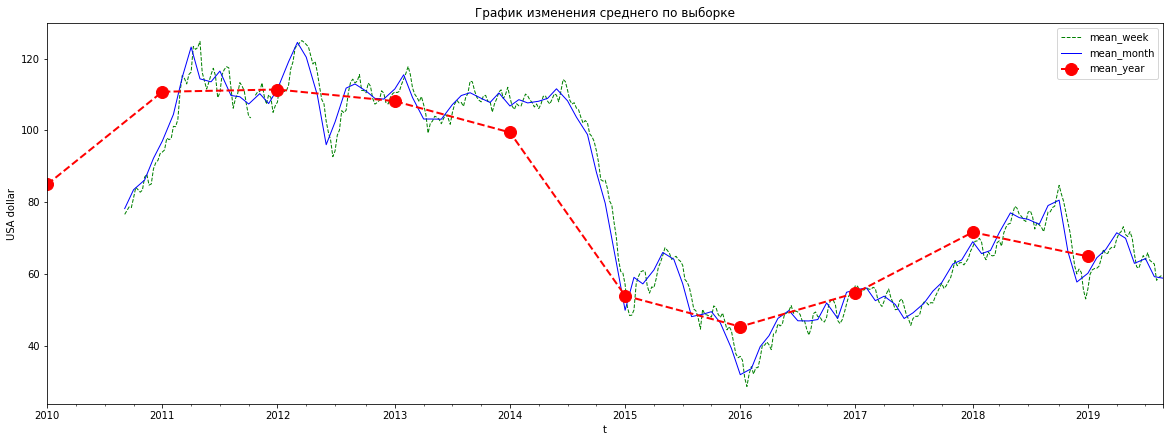

In [14]:
plt.figure(figsize=(20,7))
brent_data_week['Значение'].plot(color='g', linewidth=1, linestyle='dashed', label='mean_week')
brent_data_month['Значение'].plot(color='b', linewidth=1, label='mean_month')
brent_data_year['Значение'].plot(color='r', marker='o', linestyle='dashed', linewidth=2, markersize=12, label='mean_year')
plt.legend()
plt.ylabel('USA dollar')
plt.xlabel('t')
plt.title('График изменения среднего по выборке');

In [15]:
bdw = brent_data.resample("W").std()
bdm = brent_data.resample("M").std()
bdy = brent_data.resample("Y").std()

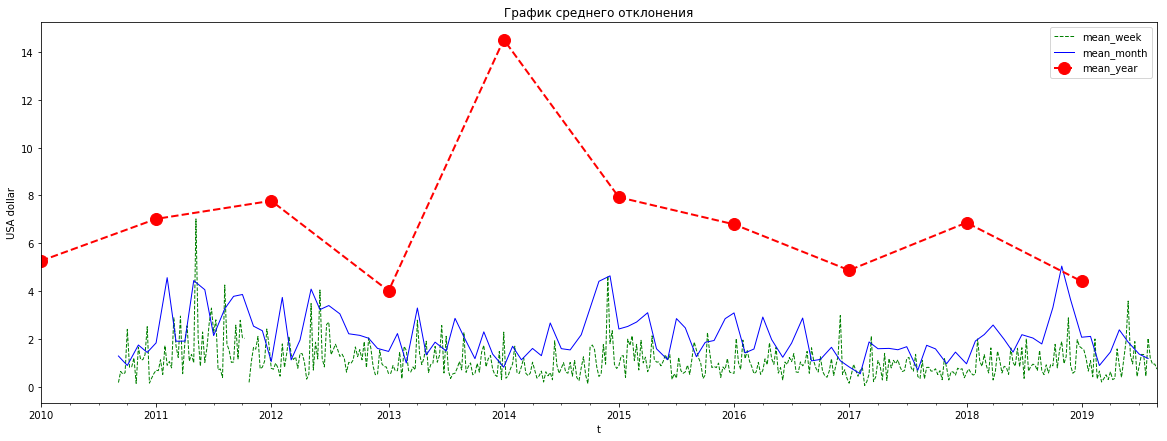

In [16]:
plt.figure(figsize=(20,7))
bdw['Значение'].plot(color='g', linewidth=1, linestyle='dashed', label='mean_week')
bdm['Значение'].plot(color='b', linewidth=1, label='mean_month')
bdy['Значение'].plot(color='r', marker='o', linestyle='dashed', linewidth=2, markersize=12, label='mean_year')
plt.legend()
plt.ylabel('USA dollar')
plt.xlabel('t')
plt.title('График среднего отклонения');

##### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

##### При увеличении периода измерений уменьшается частота и амплитуда колебаний, в то же время среднеквадратичное отклонение, наоборот, растёт по амплитуде с ростом периода.